In [1]:
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-p_dhby45
  Running command git clone -q https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-p_dhby45
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 554c6f13102fd81e129b644e604cc4051be7e6c0


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install numexpr

     |████████████████████████████████| 473 kB 5.2 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [5]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile
from qiskit import ClassicalRegister, QuantumRegister,QuantumCircuit,execute,Aer
# import basic plot tools
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [13]:
from qiskit_textbook.widgets import bv_widget
bv_widget(8, "11101101", hide_oracle=False)


HTMLMath(value='$$ |00000000\\rangle = |00000000\\rangle $$')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xce\x00\x00\x025\x08\x06\x00\x00\x00\x9e\xd5\xc5…

In [14]:
from qiskit_textbook.widgets import bv_widget
bv_widget(4, "1011", hide_oracle=False)

HTMLMath(value='$$ |0000\\rangle = |0000\\rangle $$')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xce\x00\x00\x01E\x08\x06\x00\x00\x00\xa4\x1f\xd2…

In [28]:
from qiskit_textbook.widgets import bv_widget
bv_widget(3, "011", hide_oracle=False)

HTMLMath(value='$$ |000\\rangle = |000\\rangle $$')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xce\x00\x00\x01\x08\x08\x06\x00\x00\x00\x17\xd9\…

In [29]:
# Verification of bz algorithm using the implementation section tools
def bv_implement(n,s):
        # We need a circuit with n qubits, plus one auxiliary qubit
    # Also need n classical bits to write the output to
    bv_circuit = QuantumCircuit(n+1, n)

    # put auxiliary in state |->
    bv_circuit.h(n)
    bv_circuit.z(n)

    # Apply Hadamard gates before querying the oracle
    for i in range(n):
        bv_circuit.h(i)

    # Apply barrier 
    bv_circuit.barrier()

    # Apply the inner-product oracle
    s = s[::-1] # reverse s to fit qiskit's qubit ordering
    for q in range(n):
        if s[q] == '0':
            bv_circuit.i(q)
        else:
            bv_circuit.cx(q, n)

    # Apply barrier 
    bv_circuit.barrier()

    #Apply Hadamard gates after querying the oracle
    for i in range(n):
        bv_circuit.h(i)

    # Measurement
    for i in range(n):
        bv_circuit.measure(i, i)
        
    return bv_circuit
        




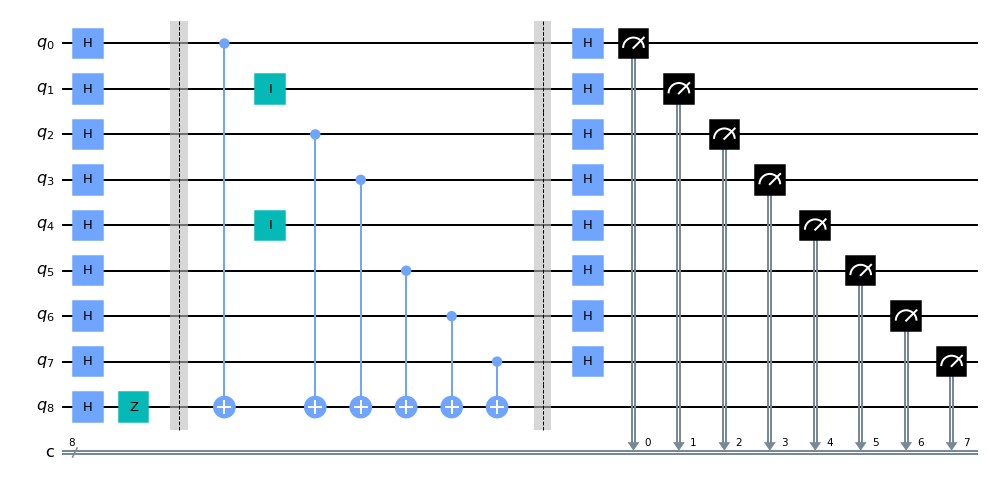

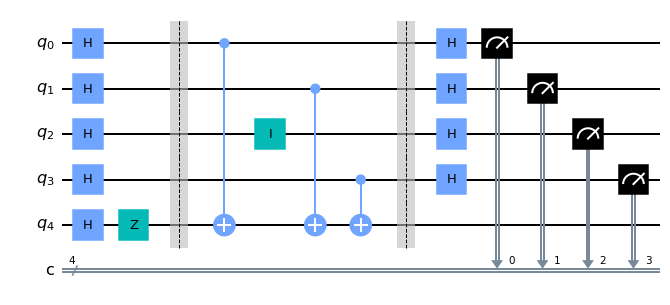

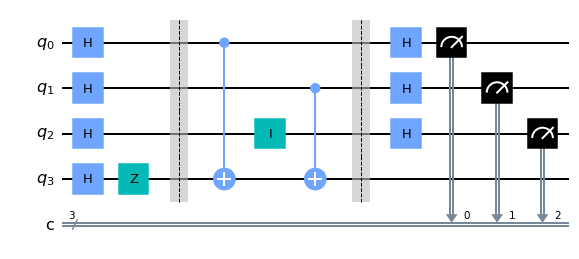

In [26]:
#bv_circuit = bv_implement(8, "11101101")
#bv_circuit.draw("mpl")
parameters =[ [8, "11101101"],[4, "1011"],[3, "011"]]
bv_circuits = [bv_implement(n,s) for n,s in  parameters ]   

# Display circuit

for i in range(3):
    fig = plt.figure(i)
    plt.plot()
    axs  = fig.get_axes()
    bv_circuits[i].draw(output='mpl',ax =axs[0])



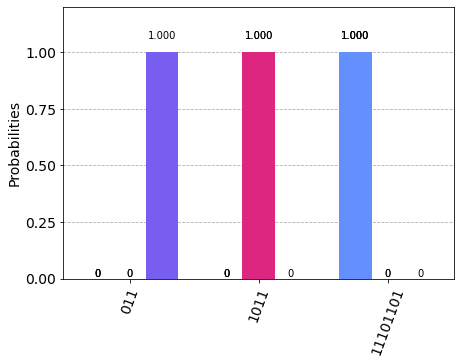

In [30]:
# use local simulator
simulator = Aer.get_backend('qasm_simulator')
#量子回路のシミュレーターを使った実行, Repeat circuit= #(shots) times
job = simulator.run(transpile(bv_circuits, simulator))
#測定結果の取り出し
result = job.result()
counts = result.get_counts()
# Show results
plot_histogram(counts)

